![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Satellite AOD data accuracy assessment for air quality and temperature relationships in the Southeastern US
&nbsp;

Production date: 30-09-2024

Produced by: Consiglio Nazionale delle Ricerche (CNR)


## 🌍 Use case: Using satellite observations to explain the relationship between aerosols and both near-surface  and skin temperatures.  

## ❓ Quality assessment question

**• Is the accuracy of the AOD estimates sufficient to study the relationship between air quality and temperature in the Southeastern US?**

The "satellite-aerosol-properties" catalogue provides global information on essential aerosol variables: aerosol optical depth (AOD) and fine-mode aerosol optical depth (fAOD) from 1995 to present, derived from satellite observations. The SLSTR dataset is used in the following analysis to demonstrate how this catalogue can capture the seasonal maps and monthly trends of AOD and fAOD. 

The dominant source of natural aerosols over Earth’s vast forested regions are biogenic volatile organic compounds (BVOC). Recently, studies on the emissions of BVOCs have substantially increased, as they have a significant impact on human health and climate change due to their large emissions and high reactivity [1]. There is evidence that the temperature in the southeastern US is dependent on enhanced natural BVOC emissions on warmer days. There are several aerosol sources that could explain the temperature dependence of AOD, for example, biogenic emissions, secondary organic aerosols (SOA) formed in the aqueous phase, or biomass burning emissions [2]. This notebook determines whether the AOD's time and spatial sampling are sufficient to support our investigation of the monthly correlation between the AOD and temperature.

## 📢 Quality assessment statement

The accuracy of the AOD from the Sentinel 3 satellite is not sufficient to study the relationship between air quality and temperature in the southeastern US.

1. Considering the spatial maps of AOD and fAOD for the period 2017–2022 in the southeastern US, the highest values of AOD and fAOD were observed during the summer.

   
2. In the literature, the near-surface temperature in the southeastern US was demonstrated to depend on enhanced natural BVOC emissions on warmer days (Liu, W., 2005; Xu, L., 2015). The impact of fAOD and total AOD on temperature over the southeastern US shows that there is not a straightforward correlation between temperature and AOD (total and fine mode), allowing us to support the thesis of a strong correlation between aerosols due to anthropogenic emissions and near-surface temperature. Also, the time and spatial sampling of the AOD estimates are not sufficient to study the relationship between air quality and temperature in the southeastern US.

3. The monthly time series mapping of 2 m temperature and skin temperature indicates a notable positive correlation between these variables, demonstrating consistency between the two products.


## 📋 Methodology

The analysis and results are organised in the following steps, which are detailed in the sections below:

• Data Collection and Preprocessing: Download AOD and fine_AOD data (AOD550 and F5_AOD500 (Aerosol properties gridded data from 1995 to present derived from satellite observations), horizontal resolution: 1° x 1°; temporal resolution: monthly).

• Calculate and plot the spatially weighted mean of AOD550 and fAOD550.

• Download 2 m temperature data from the "ERA5-Land monthly averaged data from 1950 to present" catalog (horizontal resolution: 0.1° x 0.1°; temporal resolution: monthly).

• Plot the monthly time series of AOD550 and fine_AOD550 versus 2 m temperatures.

• Download skin temperature data from the "ERA5-Land monthly averaged data from 1950 to present" catalog (horizontal resolution: 0.1° x 0.1°; temporal resolution: monthly).

• Plot the monthly time series of AOD550 and fine_AOD550 versus skin temperatures.

• Plot the monthly time series of 2 m and skin temperatures.

## 📈 Analysis and results

(satellite_satellite-aerosol-properties_consistency_q02:template:section-1)=
### 1. Data Collection and Preprocessing: Download AOD and fine_AOD data
Packages that were requested have been imported. The request was defined, and data was downloaded.
The time dimension for both versions was converted and redefined to ensure consistency.
The two monthly datasets (AOD and Fine_AOD) were combined along the version dimension to create a unified dataset for further analysis.

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import pandas as pd
from c3s_eqc_automatic_quality_control import diagnostics, download, plot,utils
import warnings
plt.style.use("seaborn-v0_8-notebook")
import numpy as np
from c3s_eqc_automatic_quality_control import diagnostics, download, plot,utils
warnings.filterwarnings("ignore")


from c3s_eqc_automatic_quality_control import download

collection_id = "satellite-aerosol-properties"
request = {
    "format": "zip",
    "time_aggregation": "monthly_average",
    "variable": "aerosol_optical_depth",
    "sensor_on_satellite": "slstr_on_sentinel_3a",
    "algorithm": "ens",
}

time_dict = {
    "v2.1": {"start": "2017-07", "stop": "2020-06"},
    "v2.2": {"start": "2020-07", "stop": "2022-12"},
}

lon_slice = slice(-90, -79)
lat_slice = slice(24, 35)

ds_dict = {}
for version, kwargs in time_dict.items():
    requests = download.update_request_date(
        request | {"version": version}, **kwargs, stringify_dates=True
    )
    ds_dict[version] = download.download_and_transform(
        collection_id, requests, chunks={"year": 1, "month": 1}
    )



ds_monthly_dict = {}
for version, ds in ds_dict.items():
    ds_monthly = ds.copy()
    ds_monthly["source"] = ds_monthly["source"].str.slice(None, 6)
    ds_monthly["source"] = pd.to_datetime(ds_monthly["source"], format="%Y%m")

    ds_monthly = ds_monthly.rename({'source': 'time'})

    ds_monthly = utils.regionalise(ds_monthly, lon_slice=lon_slice, lat_slice=lat_slice)

    ds_monthly_dict[version] = ds_monthly

for version, ds_monthly in ds_monthly_dict.items():
    print(f"Version {version}:")
   



ds_monthly_merged = xr.concat([ds_monthly_dict['v2.1'],ds_monthly_dict['v2.2']], dim='time')

print(ds_monthly_merged)

100%|██████████| 30/30 [00:01<00:00, 21.88it/s]


Version v2.1:
Version v2.2:
<xarray.Dataset> Size: 128kB
Dimensions:                      (time: 66, latitude: 11, longitude: 11)
Coordinates:
  * time                         (time) datetime64[ns] 528B 2017-07-01 ... 20...
  * latitude                     (latitude) float32 44B 24.5 25.5 ... 33.5 34.5
  * longitude                    (longitude) float32 44B -89.5 -88.5 ... -79.5
Data variables:
    AOD550                       (time, latitude, longitude) float32 32kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    FM_AOD550                    (time, latitude, longitude) float32 32kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    AOD550_UNCERTAINTY_ENSEMBLE  (time, latitude, longitude) float32 32kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    NMEAS                        (time, latitude, longitude) float32 32kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
Attributes: (12/18)
    Conventions:               CF-1.6
    creator_email:             thomas.popp@

(satellite_satellite-aerosol-properties_consistency_q02:template:section-2)=

### 2. Calculate and plot the spatially weighted mean of AOD550 and fAOD550.
We calculated the spatially weighted mean of AOD550 and fAOD550 over Southeastern US for the period 2017-2022.

<xarray.Dataset> Size: 8kB
Dimensions:                      (season: 4, latitude: 11, longitude: 11)
Coordinates:
  * latitude                     (latitude) float32 44B 24.5 25.5 ... 33.5 34.5
  * longitude                    (longitude) float32 44B -89.5 -88.5 ... -79.5
  * season                       (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    AOD550                       (season, latitude, longitude) float32 2kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    FM_AOD550                    (season, latitude, longitude) float32 2kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    AOD550_UNCERTAINTY_ENSEMBLE  (season, latitude, longitude) float32 2kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    NMEAS                        (season, latitude, longitude) float32 2kB dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
Attributes: (12/18)
    Conventions:               CF-1.6
    creator_email:             thomas.popp@dlr.de
    creator_name:     

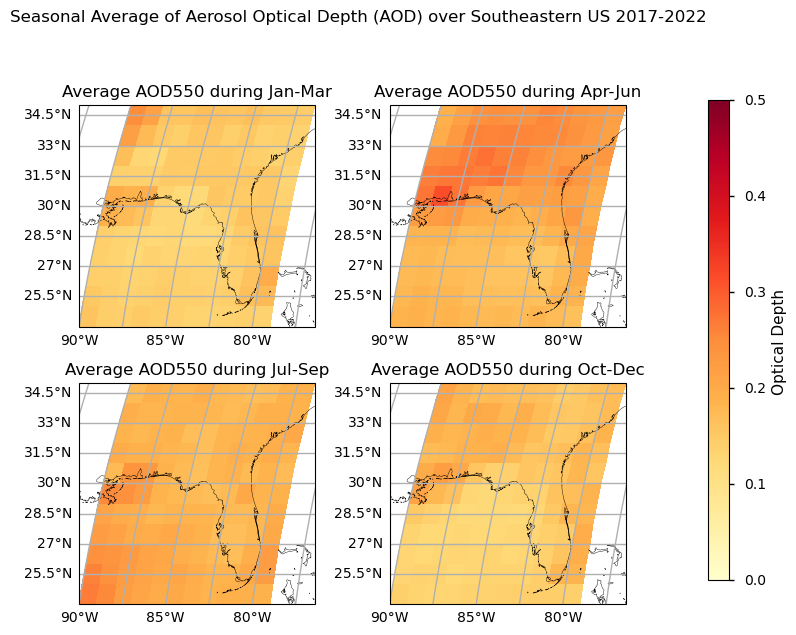

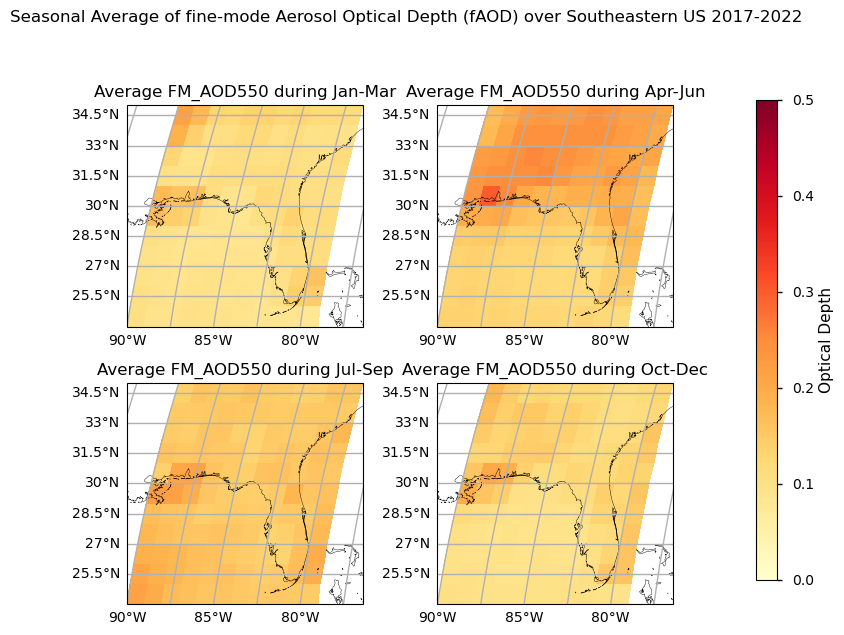

In [9]:
ds_seas=ds_monthly_merged.groupby('time.season').mean() #seasonal mean
print(ds_seas)

titles = ['Average AOD550 during Jan-Mar', 'Average AOD550 during Apr-Jun',
          'Average AOD550 during Jul-Sep', 'Average AOD550 during Oct-Dec']

map_proj = ccrs.Robinson()

p = ds_seas["AOD550"].plot.pcolormesh(cmap='YlOrRd', vmax=0.5, vmin=0, col="season", col_wrap=2,
                                      transform=ccrs.PlateCarree(),
                                      subplot_kws={"projection": map_proj},
                                      add_colorbar=False)

for ax, title in zip(p.axs.flat, titles):
    ax.coastlines()
    ax.set_title(title)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

mappable = p.axes[0][0].collections[0]

# Create colorbar
cax = plt.axes([1, 0.1, 0.03, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('Optical Depth ')

# Set the main title for the entire figure
plt.suptitle("Seasonal Average of Aerosol Optical Depth (AOD) over Southeastern US 2017-2022", y=1.05)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the main title
plt.show()

############
# Assuming `ds_seas` and other necessary data are already defined

titles = ['Average FM_AOD550 during Jan-Mar', 'Average FM_AOD550 during Apr-Jun',
          'Average FM_AOD550 during Jul-Sep', 'Average FM_AOD550 during Oct-Dec']

map_proj = ccrs.Robinson()

p = ds_seas["FM_AOD550"].plot.pcolormesh(cmap='YlOrRd', vmax=0.5, vmin=0, col="season", col_wrap=2,
                                         transform=ccrs.PlateCarree(),
                                         subplot_kws={"projection": map_proj},
                                         add_colorbar=False)

for ax, title in zip(p.axs.flat, titles):
    ax.coastlines()
    ax.set_title(title)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

mappable = p.axes[0][0].collections[0]

# Create colorbar
cax = plt.axes([1, 0.1, 0.03, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('Optical Depth')

# Set the main title for the entire figure
plt.suptitle("Seasonal Average of fine-mode Aerosol Optical Depth (fAOD) over Southeastern US 2017-2022", y=1.05)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the main title
plt.show()



(satellite_satellite-aerosol-properties_consistency_q02:template:section-3)=

### 3. Download 2 m temperature data from the "ERA5-Land monthly averaged data from 1950 to present" catalog (horizontal resolution: 0.1° x 0.1°; temporal resolution: monthly).

In [35]:
collection_id_t2m = "reanalysis-era5-land-monthly-means"
request_t2m = {
    "format": "grib",
    "product_type": "monthly_averaged_reanalysis",
    "variable": "2m_temperature",
    "time": "00:00",
    "year": [ "2017","2018", "2019", "2020", "2021", "2022"],
    "month": [ "01", "02", "03", "04", "05", "06","07", "08", "09", "10", "11", "12"],
    "area": [35, -90, 24, -79],
}



# Download the original data
ds_t2m_original = download.download_and_transform(collection_id_t2m, request_t2m)

# Regrid the original data to match the grid of ds_monthly_merged 
import xarray as xr
ds_t2m_regrid = ds_t2m_original.interp(
    latitude=ds_monthly_merged.latitude,
    longitude=ds_monthly_merged.longitude,
    method='nearest',  # Use nearest-neighbor interpolation
)


# Calculate spatial weighted mean of the regridded data
da_t2m_spatial_weighted_mean = diagnostics.spatial_weighted_mean(ds_t2m_regrid)
print(da_t2m_spatial_weighted_mean) 


t2m_subset_ds = da_t2m_spatial_weighted_mean.sel(forecast_reference_time=slice('2017-07-01', '2022-12-31'))
# Extract the Period data directly from the forecast_reference_time coordinate in ds_monmean_t2m
time_period = pd.PeriodIndex(t2m_subset_ds['forecast_reference_time'].values, freq='M')

100%|██████████| 1/1 [00:00<00:00, 26.03it/s]

<xarray.Dataset> Size: 1kB
Dimensions:                  (forecast_reference_time: 72)
Coordinates:
    realization              int64 8B 0
    leadtime                 timedelta64[ns] 8B 1 days
    surface                  float64 8B 0.0
    time                     (forecast_reference_time) datetime64[ns] 576B dask.array<chunksize=(72,), meta=np.ndarray>
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 576B 20...
Data variables:
    t2m                      (forecast_reference_time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-09T07:51 GRIB to CDM+CF via cfgrib-0.9.1...


(satellite_satellite-aerosol-properties_consistency_q02:template:section-4)=
### 4. Plot the monthly time series of AOD550 and fine_AOD550 versus 2 m temperature.

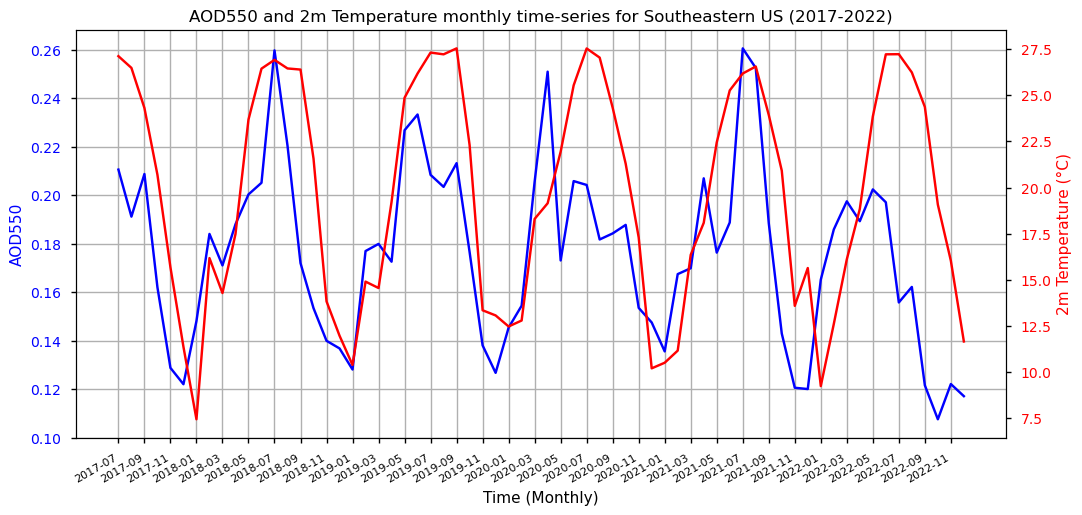

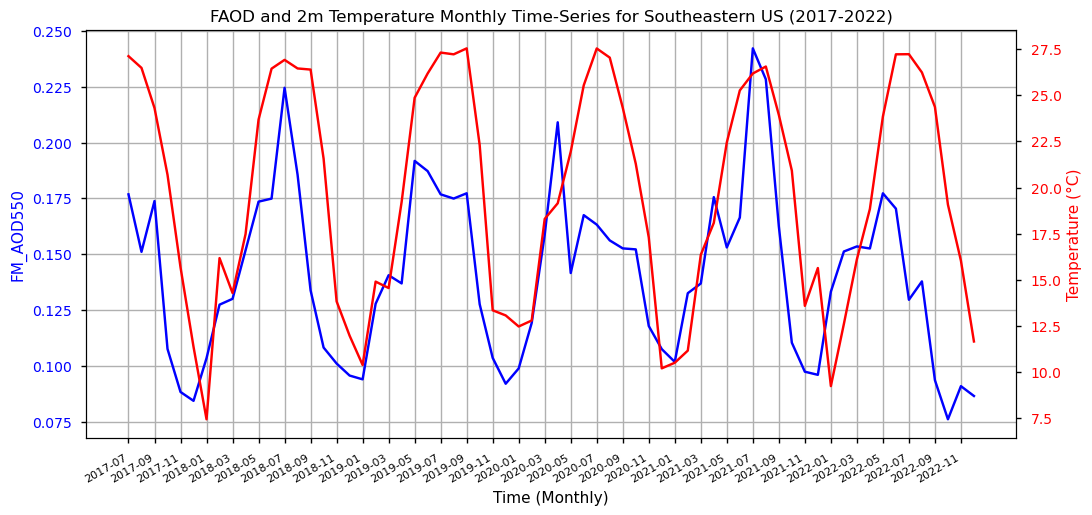

In [23]:


# Extract the Period data directly from the forecast_reference_time coordinate in ds_monmean_t2m
time_period = pd.PeriodIndex(t2m_subset_ds['forecast_reference_time'].values, freq='M')

# Define the x-axis positions and labels for quarterly intervals
positions = range(len(t2m_subset_ds['forecast_reference_time']))
monthly_labels = time_period.strftime("%Y-%m")

fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot AOD550
aod_values = ds_monthly_merged["AOD550"].mean(dim=('latitude', 'longitude')).values
ax1.plot(positions, aod_values, label="AOD550", color='blue')
ax1.set_xlabel('Time (Monthly)')
ax1.set_ylabel('AOD550', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Link temperature to the first axis
ax2 = ax1.twinx()
# Convert temperature to Celsius
temperature_kelvin = t2m_subset_ds["t2m"] - 273.15

# Plot temperature (t2m)
ax2.plot(positions, temperature_kelvin, label="t2m (monthly)", color='red')
ax2.set_ylabel('2m Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks and labels for every other data point
positions = positions[::2]
monthly_labels = monthly_labels[::2]
ax1.set_xticks(positions)
ax1.set_xticklabels(monthly_labels, rotation=45, ha='right', fontsize=8)

ax1.set_title('AOD550 and 2m Temperature monthly time-series for Southeastern US (2017-2022)')
# Adding gridlines to the plot
ax1.grid(True)

# Adjust layout and display the plot
fig.autofmt_xdate()
plt.show()







# Extract the Period data directly from the forecast_reference_time coordinate in ds_monmean_t2m
time_period = pd.PeriodIndex(t2m_subset_ds['forecast_reference_time'].values, freq='M')

# Define the x-axis positions and labels
positions = range(len(t2m_subset_ds['forecast_reference_time']))
monthly_labels = time_period.strftime("%Y-%m")

fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot AOD550
aod_values = ds_monthly_merged["FM_AOD550"].mean(dim=('latitude', 'longitude')).values
ax1.plot(positions, aod_values, label="FM_AOD550 (Quarterly)", color='blue')
ax1.set_xlabel('Time (Monthly)')
ax1.set_ylabel('FM_AOD550', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Link temperature to the first axis
ax2 = ax1.twinx()
# Convert temperature to Celsius
temperature_kelvin = t2m_subset_ds["t2m"] - 273.15

# Plot temperature (t2m)
ax2.plot(positions, temperature_kelvin, label="t2m (Quarterly)", color='red')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks and labels for every other data point
positions = positions[::2]
monthly_labels = monthly_labels[::2]
ax1.set_xticks(positions)
ax1.set_xticklabels(monthly_labels, rotation=45, ha='right', fontsize=8)

ax1.set_title('FAOD and 2m Temperature Monthly Time-Series for Southeastern US (2017-2022)')
# Adding gridlines to the plot
ax1.grid(True)

# Adjust layout and display the plot
fig.autofmt_xdate()
plt.show()

(satellite_satellite-aerosol-properties_consistency_q02:template:section-5)=

### 5. Download skin temperature data from the "ERA5-Land monthly averaged data from 1950 to present" catalog (horizontal resolution: 0.1° x 0.1°; temporal resolution: monthly).

In [36]:
collection_id_skin_temperature = "reanalysis-era5-land-monthly-means"
request_skin_temperature = {
    "format": "grib",
    "product_type": "monthly_averaged_reanalysis",
    "variable": "skin_temperature",
    "time": "00:00",
    "year": [ "2017","2018", "2019", "2020", "2021", "2022"],
    "month": [ "01", "02", "03", "04", "05", "06","07", "08", "09", "10", "11", "12"],
    "area": [35, -90, 24, -79],
}


# Download the original data
ds_skin_temperature_original = download.download_and_transform(collection_id_skin_temperature, request_skin_temperature)

# Regrid the original data to match the grid of ds_monthly_merged 
import xarray as xr
ds_skin_temperature_regrid = ds_skin_temperature_original.interp(
    latitude=ds_monthly_merged.latitude,
    longitude=ds_monthly_merged.longitude,
    method='nearest',  # Use nearest-neighbor interpolation
)


# Calculate spatial weighted mean of the regridded data
da_skin_temperature_spatial_weighted_mean = diagnostics.spatial_weighted_mean(ds_skin_temperature_regrid)
print(da_skin_temperature_spatial_weighted_mean) 


skin_temperature_subset_ds = da_skin_temperature_spatial_weighted_mean.sel(forecast_reference_time=slice('2017-07-01', '2022-12-31'))
# Extract the Period data directly from the forecast_reference_time coordinate in ds_monmean_t2m
time_period = pd.PeriodIndex(skin_temperature_subset_ds['forecast_reference_time'].values, freq='M')

100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

<xarray.Dataset> Size: 1kB
Dimensions:                  (forecast_reference_time: 72)
Coordinates:
    realization              int64 8B 0
    leadtime                 timedelta64[ns] 8B 00:00:00
    surface                  float64 8B 0.0
    time                     (forecast_reference_time) datetime64[ns] 576B dask.array<chunksize=(72,), meta=np.ndarray>
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 576B 20...
Data variables:
    skt                      (forecast_reference_time) float32 288B dask.array<chunksize=(72,), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-09T07:51 GRIB to CDM+CF via cfgrib-0.9.1...


(satellite_satellite-aerosol-properties_consistency_q02:template:section-6)=
### 6. Plot the monthly time series of AOD550 and fine_AOD550 versus skin temperature.

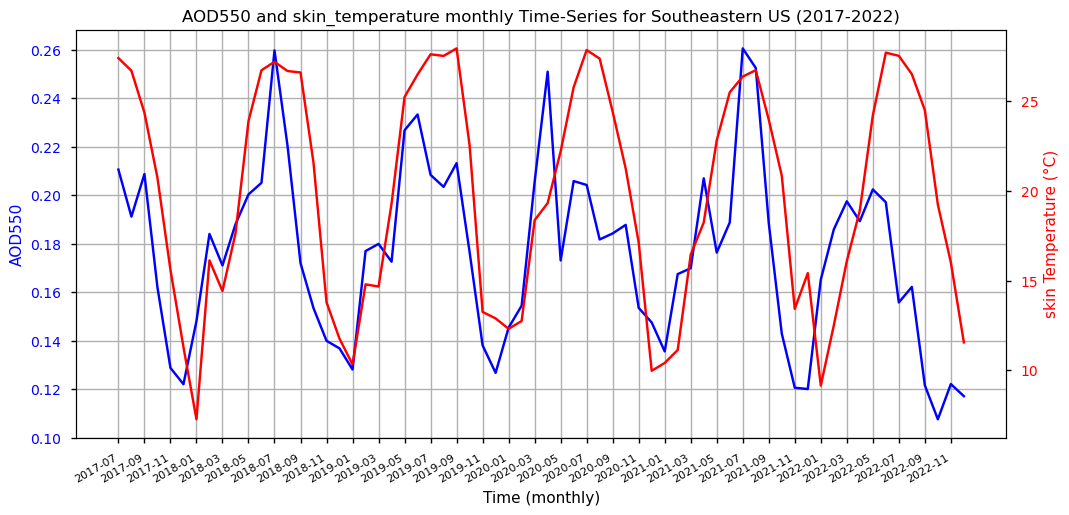

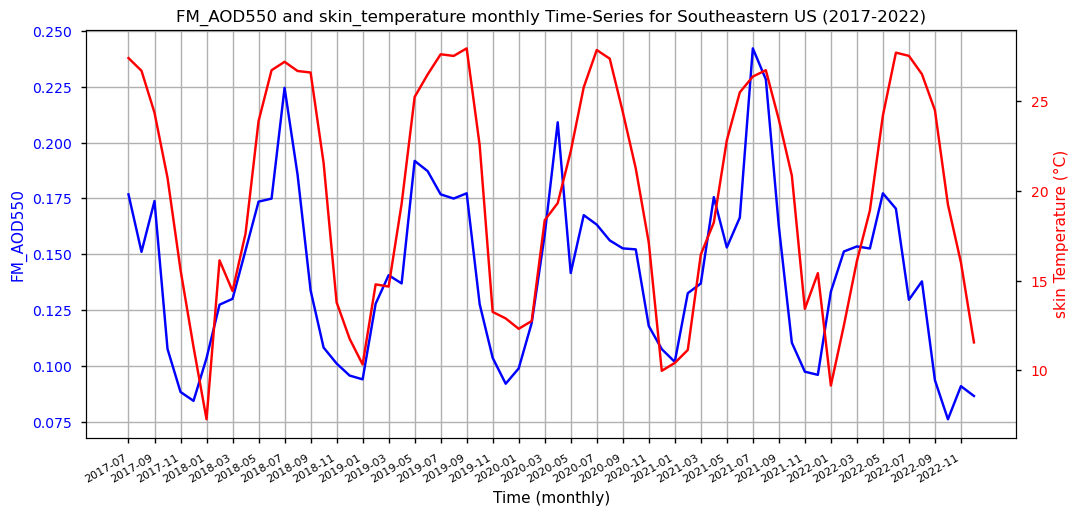

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the Period data directly from the forecast_reference_time coordinate 
time_period = pd.PeriodIndex(skin_temperature_subset_ds['forecast_reference_time'].values, freq='M')

# Define the x-axis positions and labels
positions = range(len(skin_temperature_subset_ds['forecast_reference_time']))
monthly_labels = time_period.strftime("%Y-%m")

fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot AOD550
aod_values = ds_monthly_merged["AOD550"].mean(dim=('latitude', 'longitude')).values
ax1.plot(positions, aod_values, label="AOD550", color='blue')
ax1.set_xlabel('Time (monthly)')
ax1.set_ylabel('AOD550', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Link temperature to the first axis
ax2 = ax1.twinx()
# Convert temperature to Celsius
temperature_kelvin = skin_temperature_subset_ds["skt"] - 273.15

# Plot temperature (t2m)
ax2.plot(positions, temperature_kelvin, label="skt (monthly)", color='red')
ax2.set_ylabel('skin Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks and labels for every other data point
positions = positions[::2]
monthly_labels = monthly_labels[::2]
ax1.set_xticks(positions)
ax1.set_xticklabels(monthly_labels, rotation=45, ha='right', fontsize=8)

ax1.set_title('AOD550 and skin_temperature monthly Time-Series for Southeastern US (2017-2022)')

ax1.grid(True)
fig.autofmt_xdate()
plt.show()






import pandas as pd
import matplotlib.pyplot as plt

# Extract the Period data directly from the forecast_reference_time coordinate in ds_monmean_t2m
time_period = pd.PeriodIndex(skin_temperature_subset_ds['forecast_reference_time'].values, freq='M')

# Define the x-axis positions and labels for quarterly intervals
positions = range(len(skin_temperature_subset_ds['forecast_reference_time']))
monthly_labels = time_period.strftime("%Y-%m")

fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot AOD550
aod_values = ds_monthly_merged["FM_AOD550"].mean(dim=('latitude', 'longitude')).values
ax1.plot(positions, aod_values, label="FM_AOD550 (Quarterly)", color='blue')
ax1.set_xlabel('Time (monthly)')
ax1.set_ylabel('FM_AOD550', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Link temperature to the first axis
ax2 = ax1.twinx()
# Convert temperature to Celsius
temperature_kelvin = skin_temperature_subset_ds["skt"] - 273.15

# Plot temperature (t2m)
ax2.plot(positions, temperature_kelvin, label="skt (monthly)", color='red')
ax2.set_ylabel('skin Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis ticks and labels for every other data point
positions = positions[::2]
monthly_labels = monthly_labels[::2]
ax1.set_xticks(positions)
ax1.set_xticklabels(monthly_labels, rotation=45, ha='right', fontsize=8)

ax1.set_title('FM_AOD550 and skin_temperature monthly Time-Series for Southeastern US (2017-2022)')
# Adding gridlines to the plot
ax1.grid(True)

# Adjust layout and display the plot
fig.autofmt_xdate()
plt.show()

(satellite_satellite-aerosol-properties_consistency_q02:template:section-7)=
### 7. Plot the monthly mean time series of 2m_temperature and skin_temperature for Southeastern US during 2017-2022

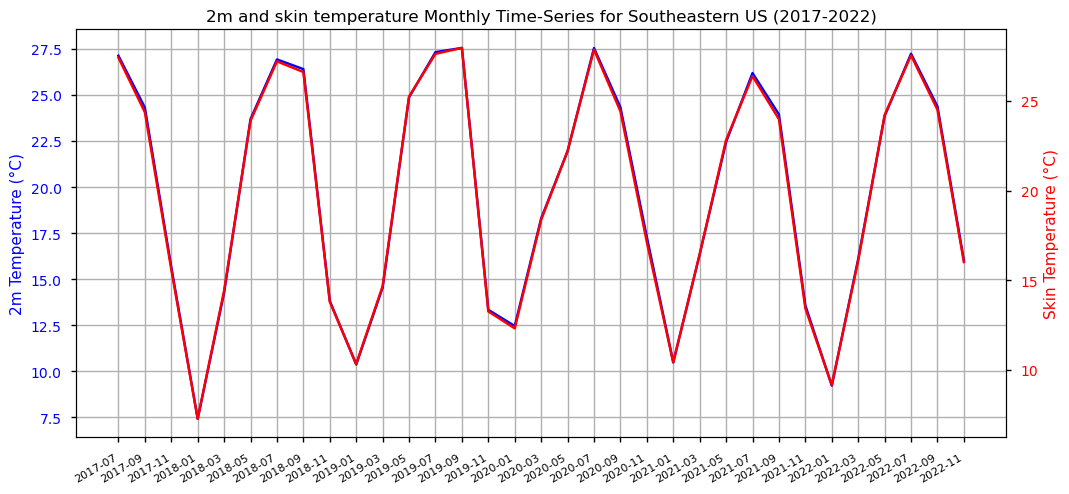

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the Period data directly from the forecast_reference_time coordinate in t2m_subset_ds
time_period = pd.PeriodIndex(skin_temperature_subset_ds['forecast_reference_time'].values, freq='M')

# Define the x-axis positions and labels for every other month
positions = range(0, len(skin_temperature_subset_ds['forecast_reference_time']), 2)
monthly_labels = time_period[::2].strftime("%Y-%m")

fig, ax1 = plt.subplots(figsize=(12, 6))
# Link temperature to the first axis
ax2 = ax1.twinx()
# Convert temperature to Celsius
temperature_skin_kelvin = skin_temperature_subset_ds["skt"] - 273.15
temperature_t2m_kelvin = t2m_subset_ds["t2m"] - 273.15

# Plot temperature (t2m)
ax1.plot(positions, temperature_t2m_kelvin[::2], label="temperature_2m (Monthly)", color='blue')
ax1.set_ylabel('2m Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(positions)
ax1.set_xticklabels(monthly_labels, rotation=45, ha='right', fontsize=8)
ax1.set_title('2m and skin temperature Monthly Time-Series for Southeastern US (2017-2022)')
# Adding gridlines to the plot
ax1.grid(True)
# Plot temperature (skin_temperature)
ax2.plot(positions, temperature_skin_kelvin[::2], label="skin_temperature (Monthly)", color='red')
ax2.set_ylabel('Skin Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust layout and display the plot
fig.autofmt_xdate()
plt.show()

## ℹ️ If you want to know more

### References
1. Cai, M., An, C., & Guy, C. (2021). A scientometric analysis and review of biogenic volatile organic compound emissions: Research hotspots, new frontiers, and environmental implications. Renewable and Sustainable Energy Reviews, 149, 111317.
2. Liu, W., Wang, Y., Russell, A. and Edgerton, E.S., 2005. Atmospheric aerosol over two urban–rural pairs in the southeastern United States: Chemical composition and possible sources. Atmospheric Environment, 39(25), pp.4453-4470.
3. Xu, L., Suresh, S., Guo, H., Weber, R.J. and Ng, N.L., 2015. Aerosol characterization over the southeastern United States using high-resolution aerosol mass spectrometry: spatial and seasonal variation of aerosol composition and sources with a focus on organic nitrates. Atmospheric Chemistry and Physics, 15(13), pp.7307-7336.